## Collection of Helpful "How to" Guides

In [3]:
"""
Created on Dec 6, 2022
@author: Katie Joyce
"""

# Import relavent packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**How to access csv data from files in other directories using pandas (on Windows):**

In [4]:
# 1) Using my function (read_my_csv):

from read_my_csv import read_my_csv

# copy path from file explorer, with r in front of it
path = r'C:\Users\katie\Documents\MSc_Thesis\Ultrasound_Project\Data\Jacobs_Nonlinearity_Stuff\Nonlinearity-master\Jacobs_Data\Cement-Models\Cement_sample_wt_rods\O2\2021-01-21_02\Trial1\10.0V\pr0.csv'
t,vol = read_my_csv(path)


# 2) Using full code:


# Import pandas
import pandas as pd

# Import the csv file using either the absolute or relative path. Important note: switch all \ to / in path for Windows.
# Ex:
df_absolute = pd.read_csv('C:/Users/katie/Documents/MSc_Thesis/Ultrasound_Project/Data/Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/300kHz/2021-07-23/Trial1/10.0V/pp0.csv')
df_relative = pd.read_csv('Jacobs_Nonlinearity_Stuff/Nonlinearity-master/Jacobs_Data/Cement-Models/Cement_wt_cu_wires/O1/Frequency_testing/300kHz/2021-07-23/Trial1/10.0V/pp0.csv')

# Show first 10 lines of dataframe to check contents
df_absolute.head(10)

# Rename columns using indices
time = df_absolute.iloc[:,0]
voltage = df_absolute.iloc[:,1]


IndexError: single positional indexer is out-of-bounds

**How to read/extract data from csv files using ComputeDelays.py:**

In [5]:
# open computedelays.py file (saved in same directory as your notebook)
exec(open('ComputeDelays.py').read())

# give the two-column data a name (ex. aluminium_100)
Aluminium_100=timedata('Aluminium_100')
readlabdat('jun10_1.csv',Aluminium_100)

**How to plot time domain signal**

Text(0.5, 1.0, 'Signal')

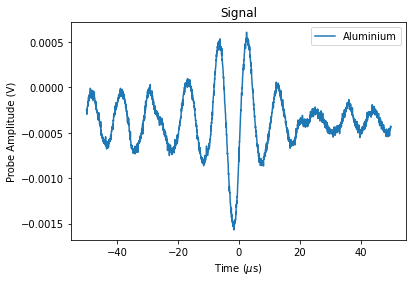

In [6]:
plt.plot(Aluminium_100.time*1e6,Aluminium_100.data,label="Aluminium")

plt.legend()
plt.xlabel("Time ($\mu$s)")
plt.ylabel('Probe Amplitude (V)')
plt.title('Signal')
#plt.savefig(".png",dpi=300)

**How to save high resolution figures:**

After "import matplotlib.pyplot as plt" and plot is created, include line:

plt.savefig("file.jpeg",dpi=300)

- .jpeg or .png
- higher dpi value is better resolution (300 is enough for a large poster)


**How to calculate FFT:**

In [7]:
# ex: Aluminium and 100 kHz
time = Aluminium_100.time   # this format if file is loaded using compute delays
data = Aluminium_100.data   # if loaded using pandas, skip this step

# 1) Using my FFT function, myfft():
from myfft import myfft
f,FT = myfft(time,data) # time in us and freq in kHz

# 2) Using FFT steps:
n_=np.size(time)
dt_=(time[2]-time[1])*1e6
f_=np.fft.fftshift(np.fft.fftfreq(n_,d=dt_))*1000
FT_=np.fft.fftshift(np.fft.fft(data - np.mean(data))) # time in us and freq in kHz


**How to plot FFT data**

Text(0.5, 1.0, 'FFT')

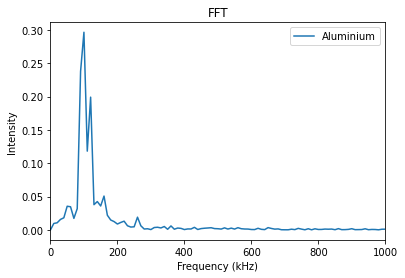

In [8]:
plt.plot(f,np.abs(FT), label="Aluminium")
plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('FFT')
#plt.savefig(".jpeg",dpi=300)

**How to find df (frequency resolution) of FFT data:**

In [9]:
df = f[2]-f[1]

print(df, "kHz")

10.0 kHz


**How to find central frequency (frequency at peak of FFT data):**

Note: this method was used to find all central frequencies throughout my thesis

In [10]:
# find the index of the max value in FT, then find the corresponding value in f at that index
Peak = abs(f[np.argmax(abs(FT))]) 

print(Peak, "kHz")

# abs of FT because it has real and imaginary components
# abs of f because the max is often the negative freq (fft plot is roughly mirrored about zero)

99.99999999999757 kHz


**How to calculate FWHM (uncertainty in central frequency):**

Note: this method was used to find all FWHM throughout my thesis

In [12]:
import peakutils
from peakutils import indexes, peak

def gaussian(x, amplitude, mean, stddev):
    y = amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

def FWHM(x,y):
    
    fits = peakutils.peak.gaussian_fit(x, y, center_only=False)
    x_new = np.linspace(x[0],x[-1],100)
    gaus_y = gaussian(x_new,fits[0], fits[1], fits[2])
    
    # Find the indices of the peaks
    peak_indices = indexes(gaus_y, thres=0.5, min_dist=1)

    # Get the index of the highest peak
    max_index = peak_indices[np.argmax(gaus_y[peak_indices])]

    # Calculate the FWHM
    half_max = gaus_y[max_index] / 2.0
    left_index = np.argmin(np.abs(gaus_y[:max_index] - half_max))
    right_index = np.argmin(np.abs(gaus_y[max_index:] - half_max)) + max_index
    fwhm = x_new[right_index] - x_new[left_index]
    
    # Find central frequency from peak index:
    central_freq = x_new[max_index]

    print("Peak Index:", max_index)
    print("Central Frequency:", central_freq)
    print("FWHM:", fwhm)
    print("")
    return x_new,gaus_y, max_index, central_freq, fwhm

In [13]:
# example data
x = np.array([0., 20., 40., 60., 80., 100., 120., 140., 160., 180., 200.])
y = np.array([1.47569980e-16, 3.75195412e-01, 6.93360468e-01, 9.09192585e-01, 1.00000000e+00, 9.61381514e-01, 8.17731984e-01, 6.06581116e-01, 3.73329928e-01, 1.60828981e-01, 7.49408815e-04])

x_new,gaus,index, central, fwhm = FWHM(x,y)

Peak Index: 44
Central Frequency: 88.8888888888889
FWHM: 111.11111111111111



**How to calculate and plot perturbed probe:**

Text(0, 0.5, 'Voltage (V)')

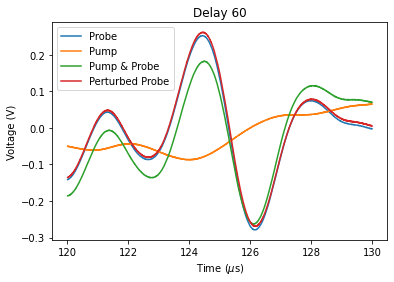

In [9]:
# Load/import pump (pu), probe (pr), and pump and probe (pp) files:


pr60=timedata('pr60')        # Probe only at delay 60, S1
readlabdat('pr60.csv',pr60)

pu60=timedata('pu60')        # PUMP only at delay 60, S2
readlabdat('pu60.csv',pu60)

pp60=timedata('pp60')        # PUMP and Probe at delay 60, S3
readlabdat('pp60.csv',pp60)


# Compute perturbed probe, by subracting the pump from the pump and probe:
# Eq: S4 = S3 - S2

pu_perturbed60 = pp60.data - pu60.data

# Plot
plt.plot(pr60.time*1e6,pr60.data,label='Probe')
plt.plot(pu60.time*1e6,pu60.data,label='Pump')
plt.plot(pp60.time*1e6,pp60.data,label='Pump & Probe')
plt.plot(pr60.time*1e6,pu_perturbed60,label='Perturbed Probe')
plt.legend()
plt.title("Delay 60")
plt.xlabel("Time ($\mu$s)")
plt.ylabel("Voltage (V)")

Note: In our set-up, the pump signal is filtered out prior to arriving at the scope. Therefore, we expect:
- the pump signal will be close to zero
- the 3 other signals (1.probe, 2.pump and probe, 3.perturbed probe) will be similar

**How to normalize signals using their maximum value**

Text(0.5, 1.0, 'Normalized FFT')

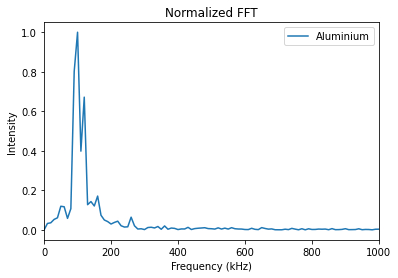

In [10]:
# divide the FT portion of the data by its max value:
FT_norm = np.abs(FT)/max(np.abs(FT))

plt.plot(f,FT_norm, label="Aluminium")
plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Normalized FFT')

**How to change font size in matplotlib**

In [1]:
# Set the default text font size
plt.rc('font', size=16)
# Set the axes title font size
plt.rc('axes', titlesize=16)
# Set the axes labels font size
plt.rc('axes', labelsize=16)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=16)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=16)
# Set the legend font size
plt.rc('legend', fontsize=18)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

plt.plot(f,FT_norm, label="Aluminium")
plt.xlim([0,1000])
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Intensity')
plt.title('Normalized FFT')

NameError: name 'plt' is not defined